# Visualize spatial binarized firing over time

Galen Wilkerson

* load mask (spatial) data (mask file)
* load firing time data (deconvolved file)
* get node locations
* for each timestep, determine network edges (and weights)
    * (either correlation, causality, or some other measure)
    
* for each timestep, determine node weights

* iterate through timesteps
    * draw one frame per timestep

### how to do this without for loops?  (numpy tricks)



In [20]:
import networkx as nx
import networkit as nk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.animation import FuncAnimation

from neuron_manifold import *

%matplotlib notebook

In [2]:
# load the mask file
filename = 'data/BASE_Ibogane_data/baseline_1/masks_neurons.mat'
baseline_1_mask = load_mat(filename)

# find the centers of each neuron
coords = find_neuron_centers(baseline_1_mask)

# draw them
# draw_neuron_centers(baseline_1_mask, coords)

filename = 'data/BASE_Ibogane_data/baseline_1/deconv.mat'
baseline_1_deconv = load_mat(filename)

# make a graph with nodes at coords and states from first timestep

In [5]:
N = baseline_1_deconv.shape[1]
G = nx.Graph()
G.add_nodes_from(range(N))

time_step = 0

# states from first timestep

(binarized_firing, binarized_not_firing) = \
    get_binarized_firing_not_firing_at_timestep(baseline_1_deconv, time_step)

firing = binarized_firing.astype(int) - binarized_not_firing.astype(int)

# positions from mask
pos = dict(zip(range(N), coords))



<IPython.core.display.Javascript object>


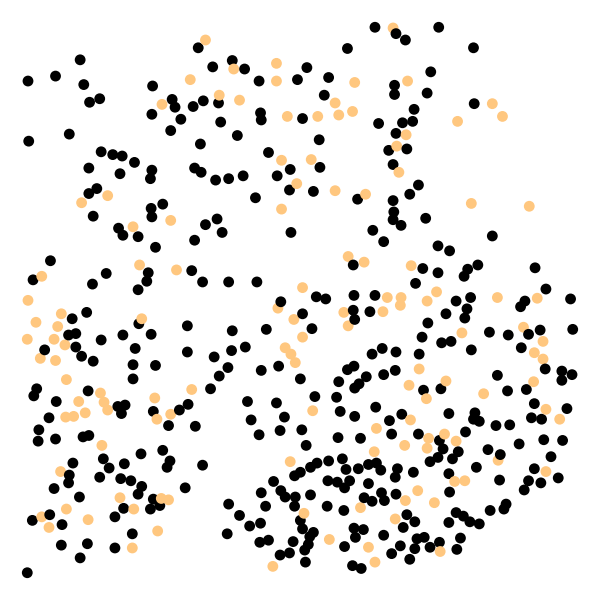

In [19]:
plt.figure(figsize=[5,5])
nx.draw(G, pos, node_color = firing, node_size = 30, cmap = plt.cm.copper);

<IPython.core.display.Javascript object>


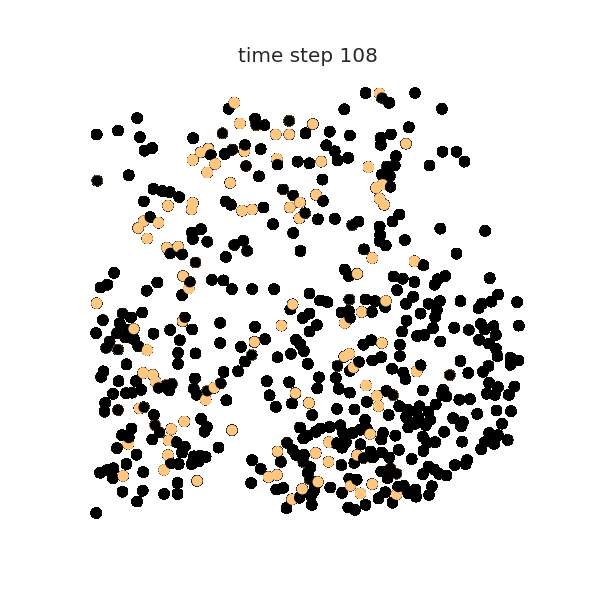

In [37]:
fig, ax = plt.subplots(figsize = [5,5])


N = baseline_1_deconv.shape[1]
G = nx.Graph()
G.add_nodes_from(range(N))

time_step = 0
num_time_steps = baseline_1_deconv.shape[0]

# positions from mask
pos = dict(zip(range(N), coords))


# initialization function: plot the background of each frame
def init():
    nx.draw(G, pos, ax = ax, node_color = firing, node_size = 30, cmap = plt.cm.copper)

def animate(i):

    time_step = i
    
    (binarized_firing, binarized_not_firing) = \
    get_binarized_firing_not_firing_at_timestep(baseline_1_deconv, time_step)

    firing = binarized_firing.astype(int) - binarized_not_firing.astype(int)
    
    nx.draw(G, pos, ax = ax, node_color = firing, node_size = 30, cmap = plt.cm.copper)
    ax.set_title('time step ' + str(i))
    
    print(i)

    
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

anim.save('baseline_1_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264']);